In [27]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [28]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [29]:
NUM_CLASSES = 27

# Dataset reading

In [30]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [31]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [34]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 27)             │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,367 (5.34 KB)

 Trainable params: 1,367 (5.34 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [36]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [37]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
107/114 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1037 - loss: 3.1823
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1053 - loss: 3.1743 - val_accuracy: 0.1899 - val_loss: 2.7430
Epoch 2/1000
105/114 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1857 - loss: 2.7572
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1872 - loss: 2.7502 - val_accuracy: 0.3257 - val_loss: 2.3512
Epoch 3/1000
113/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2608 - loss: 2.4381
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2610 - loss: 2.4368 - val_accuracy: 0.4534 - val_loss: 2.0055
Epoch 4/1000
108/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3180 - loss: 2.1755
Epoch 4: saving model to model/keypoint_classifier/keypoint_clas

In [38]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8312 - loss: 0.6447


In [39]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [40]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
[4.3985670e-05 9.5065590e-03 5.3260642e-01 7.7380113e-02 8.6996285e-03
 2.0322120e-03 1.0407340e-06 5.0823760e-06 4.3966375e-05 2.5393423e-24
 3.8040025e-15 1.2437010e-12 8.4311447e-05 1.2715418e-08 3.6843014e-01
 3.3849198e-14 8.7986987e-12 1.2190213e-10 1.1665882e-03 6.9499645e-10
 7.3295164e-14 7.1767937e-17 2.5461694e-25 2.2222931e-12 3.2186122e-24
 2.1817779e-26 3.6465462e-09]
2


# Confusion matrix

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


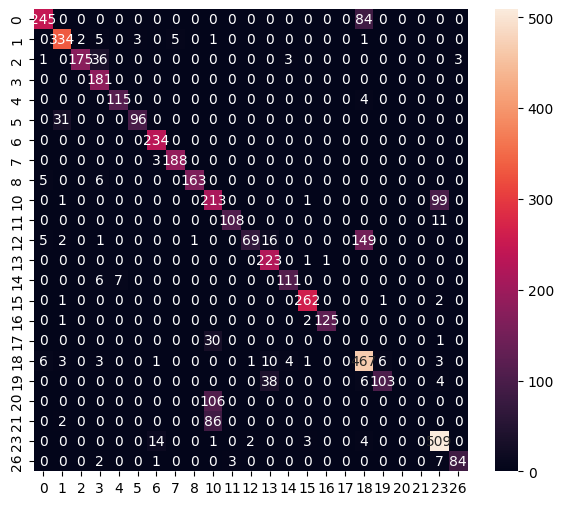

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       329
           1       0.89      0.95      0.92       351
           2       0.99      0.80      0.89       218
           3       0.75      1.00      0.86       181
           4       0.94      0.97      0.95       119
           5       0.97      0.76      0.85       127
           6       0.92      1.00      0.96       234
           7       0.97      0.98      0.98       191
           8       0.99      0.94      0.96       174
          10       0.49      0.68      0.57       314
          11       0.97      0.91      0.94       119
          12       0.96      0.28      0.44       243
          13       0.78      0.99      0.87       225
          14       0.94      0.90      0.92       124
          15       0.97      0.98      0.98       266
          16       0.99      0.98      0.98       128
          17       0.00      0.00      0.00        31
     

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [42]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [43]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmplicq0ukg\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmplicq0ukg\assets


Saved artifact at 'C:\Users\Admin\AppData\Local\Temp\tmplicq0ukg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  1720210877072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1720210876016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1720210443952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1720207831456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1720207810976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1720210464080: TensorSpec(shape=(), dtype=tf.resource, name=None)


7568

# Inference test

In [44]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [45]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [46]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [47]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [48]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.3985565e-05 9.5065320e-03 5.3260618e-01 7.7380076e-02 8.6996118e-03
 2.0322111e-03 1.0407326e-06 5.0823737e-06 4.3966233e-05 2.5393214e-24
 3.8039860e-15 1.2436956e-12 8.4311083e-05 1.2715340e-08 3.6843032e-01
 3.3849053e-14 8.7986606e-12 1.2190136e-10 1.1665849e-03 6.9499340e-10
 7.3294561e-14 7.1767348e-17 2.5461484e-25 2.2222836e-12 3.2185734e-24
 2.1817515e-26 3.6465373e-09]
2
